<a href="https://colab.research.google.com/github/anilmacherla/Heat_Disease_EDA_Python/blob/main/HeartDiseaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code to upload the file from the device
from google.colab import files

uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import seaborn as sb
#read the data into the data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import model_selection

In [ ]:

df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
#chehck the data is loaded properly in dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Check for null values
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
#Null values count
df['bmi'].isna().sum()

201

In [ ]:
#Identify the categorical variable
df.describe().columns
list(set(df.columns) - set(df.describe().columns))

['work_type', 'smoking_status', 'ever_married', 'gender', 'Residence_type']

In [ ]:
#drop NAN rows in the data frame
df1 = df
df1 = df1.dropna()
df1['bmi'].isna().sum()

0

In [ ]:
#Replacing the null values with median
median=df.bmi.median()
df['bmi_median'] =  df['bmi'].fillna(median)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_median
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0


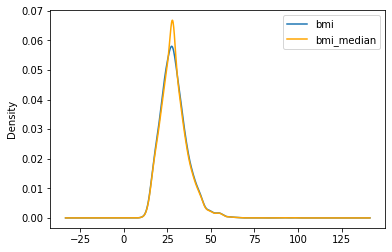

In [ ]:
#Plotting the variance distribution between the bmi and bmi_median
fig = plt.figure()
ax = fig.add_subplot(111)
df1['bmi'].plot(kind='kde', ax=ax)
df['bmi_median'].plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
#Replacing the null values with random values
df['bmi_random'] = df['bmi']
random_sample_value = df['bmi'].dropna().sample(df['bmi'].isnull().sum(),random_state=0)
random_sample_value.index = df[df['bmi'].isnull()].index
df.loc[df['bmi'].isnull(),'bmi_random'] =random_sample_value

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_median,bmi_random
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.1,27.3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0,24.0


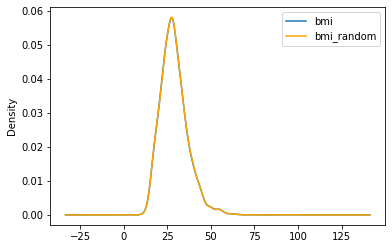

In [ ]:
#Plotting the variance distribution between the bmi and bmi_random
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df1['bmi'].plot(kind='kde', ax=ax)
df['bmi_random'].plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5, 1.0, 'Variance Distribution between bmi,bmi_median and bmi_random ')

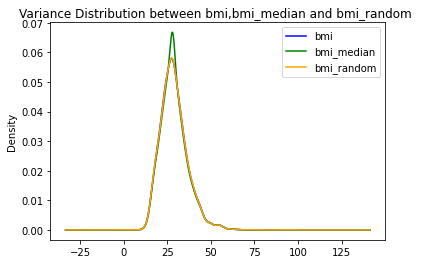

In [ ]:
#Plotting the variance distribution between the bmi, bmi_median and bmi_random
df1.bmi.plot(kind='kde',color='b')
df.bmi_median.plot(kind='kde',color='green')
df.bmi_random.plot(kind='kde',color='orange')
plt.legend()
plt.title("Variance Distribution between bmi,bmi_median and bmi_random ")

In [ ]:
#Get the corelation of the bmi columns over target
print(df['bmi'].corr(df['stroke']))
print(df1['bmi'].corr(df1['stroke']))
print(df['bmi_median'].corr(df['stroke']))
print(df['bmi_random'].corr(df['stroke']))

0.04237366114923359
0.04237366114923359
0.03610996321537815
0.03148123053621638


In [ ]:
#corelation matrix
correlation  = df.corr()
cmap=sb.diverging_palette(10, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

correlation.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_median,bmi_random
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01,0.01,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25,0.32,0.32
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13,0.16,0.16
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13,0.04,0.04
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13,0.17,0.17
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04,1.00,1.00
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00,0.04,0.03
bmi_median,0.01,0.32,0.16,0.04,0.17,1.00,0.04,1.00,0.98
bmi_random,0.01,0.32,0.16,0.04,0.17,1.00,0.03,0.98,1.00


In [ ]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_median,bmi_random
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388,0.005555,0.009116
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,0.324296,0.319039
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,0.158293,0.159008
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,0.036916,0.043491
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,0.166876,0.166672
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,1.000000,1.000000
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000,0.036110,0.031481
bmi_median,0.005555,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110,1.000000,0.983146
bmi_random,0.009116,0.319039,0.159008,0.043491,0.166672,1.000000,0.031481,0.983146,1.000000


In [ ]:
correlation  = df1.corr()
correlation.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.01,0.00,0.00,0.01,0.00,0.00
age,0.01,1.00,0.27,0.26,0.24,0.33,0.23
hypertension,0.00,0.27,1.00,0.12,0.18,0.17,0.14
heart_disease,0.00,0.26,0.12,1.00,0.15,0.04,0.14
avg_glucose_level,0.01,0.24,0.18,0.15,1.00,0.18,0.14
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.00,0.23,0.14,0.14,0.14,0.04,1.00


Based on the corelation matrix we can state that age is highly corelated to stroke

In [ ]:
#shape of data after droping nan values
df1.shape

(4909, 12)

In [ ]:
#EDA of feature distribution over target

[Text(0.5, 1.0, 'Feature Distribution of gender')]

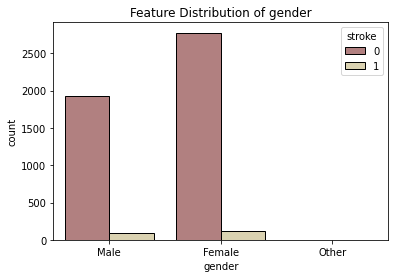

In [ ]:
sns.countplot(data=df1, x='gender',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of gender')

[Text(0.5, 1.0, 'Feature Distribution of hypertension')]

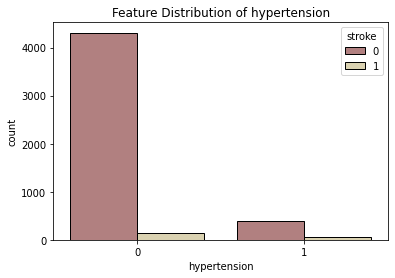

In [ ]:
sns.countplot(data=df1, x='hypertension',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of hypertension')

[Text(0.5, 1.0, 'Feature Distribution of heart disease')]

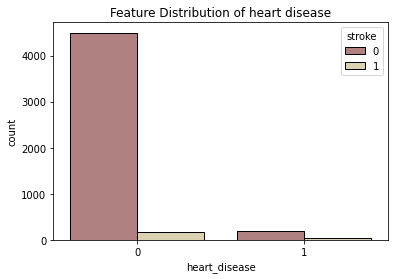

In [ ]:
sns.countplot(data=df1, x='heart_disease',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of heart disease')

[Text(0.5, 1.0, 'Feature Distribution of ever_married')]

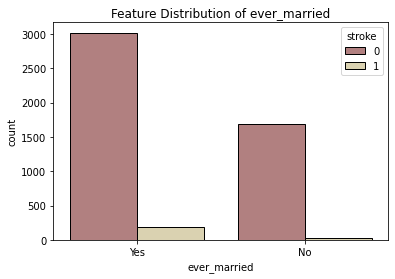

In [ ]:
sns.countplot(data=df1, x='ever_married',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of ever_married')

[Text(0.5, 1.0, 'Feature Distribution of work type')]

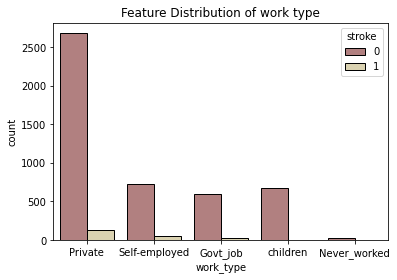

In [ ]:
sns.countplot(data=df1, x='work_type',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of work type')

[Text(0.5, 1.0, 'Feature Distribution of recidence area')]

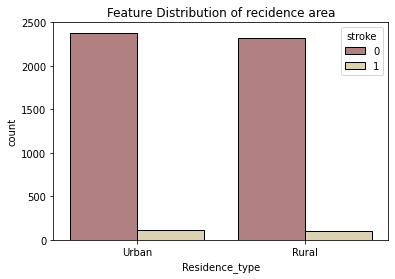

In [ ]:
sns.countplot(data=df1, x='Residence_type',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of recidence area')

[Text(0.5, 1.0, 'Feature Distribution of smoking status')]

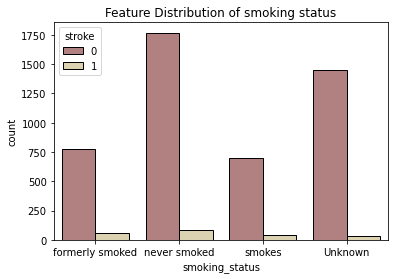

In [ ]:
sns.countplot(data=df1, x='smoking_status',palette = 'pink', hue='stroke',edgecolor='black').set(title='Feature Distribution of smoking status')

[Text(0.5, 1.0, 'Distribution of the target variable')]

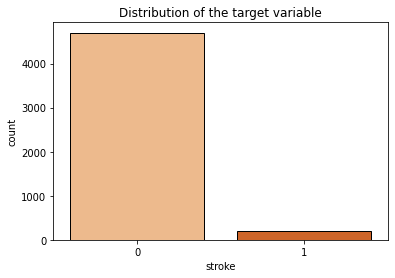

In [ ]:
#Distribution of traget variable
sns.countplot(data=df1, x='stroke',palette = 'Oranges', edgecolor='black').set(title='Distribution of the target variable')

[Text(0.5, 1.0, 'Feature distribution of avg glucose level')]

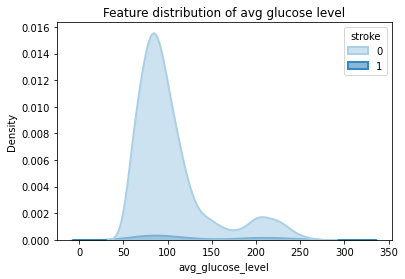

In [ ]:
sns.kdeplot(data=df1, x='avg_glucose_level',hue="stroke", fill=True,palette="Blues", alpha=.6, linewidth=2).set(title='Feature distribution of avg glucose level')

[Text(0.5, 1.0, 'Feature distribution of age')]

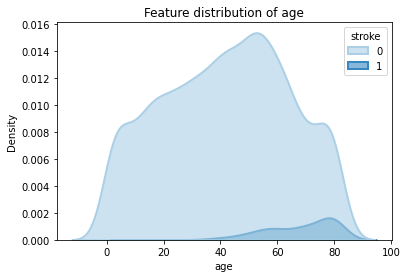

In [ ]:
sns.kdeplot(data=df1, x='age',hue="stroke", fill=True,palette="Blues", alpha=.6, linewidth=2).set(title='Feature distribution of age')

[Text(0.5, 1.0, 'Feature distribution of bmi')]

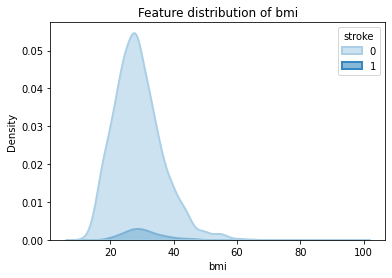

In [ ]:
sns.kdeplot(data=df1, x='bmi',hue="stroke", fill=True,palette="Blues", alpha=.6, linewidth=2).set(title='Feature distribution of bmi')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
#get max and min values for grouping
print(df1["age"].min())
print(df1["age"].max())
print(df1["bmi"].min())
print(df1["bmi"].max())
print(df1["avg_glucose_level"].min())
print(df1["avg_glucose_level"].max())

0.08
82.0
10.3
97.6
55.12
271.74


In [ ]:
#Grouping the bmi, age, glucose levels for df1 (nan dropped)

In [ ]:
df1['bmi'] = pd.cut(x=df1['bmi'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])

In [ ]:
df1['bmi'].unique()

['Obese', 'Healthy', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Healthy' < 'Overweight' < 'Obese']

In [ ]:
df1['age'] = pd.cut(x=df1['age'], bins=[0,12.0,25.0,45.0,100],
                     labels=['child','teen','middle_age', 'senior'])

In [ ]:
df1['age'].unique()

['senior', 'middle_age', 'teen', 'child']
Categories (4, object): ['child' < 'teen' < 'middle_age' < 'senior']

In [ ]:
df1['avg_glucose_level'] = df1['avg_glucose_level'].div(18).round(2)
print(df1["avg_glucose_level"].min())
print(df1["avg_glucose_level"].max())

3.06
15.1


In [ ]:
df1['avg_glucose_level'] = pd.cut(x=df1['avg_glucose_level'], bins=[0,5.7,6.4,15.1],
                     labels=['normal','pre_diabatic','diabatic'])

In [ ]:
df1['avg_glucose_level'].unique()

['diabatic', 'pre_diabatic', 'normal']
Categories (3, object): ['normal' < 'pre_diabatic' < 'diabatic']

In [ ]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,senior,0,1,Yes,Private,Urban,diabatic,Obese,formerly smoked,1
2,31112,Male,senior,0,1,Yes,Private,Rural,pre_diabatic,Obese,never smoked,1
3,60182,Female,senior,0,0,Yes,Private,Urban,diabatic,Obese,smokes,1
4,1665,Female,senior,1,0,Yes,Self-employed,Rural,diabatic,Healthy,never smoked,1
5,56669,Male,senior,0,0,Yes,Private,Urban,diabatic,Overweight,formerly smoked,1


In [ ]:
#EDA od age, bmi, glucose levels after grouping

[Text(0.5, 1.0, 'Age Feature Distribution after grouping')]

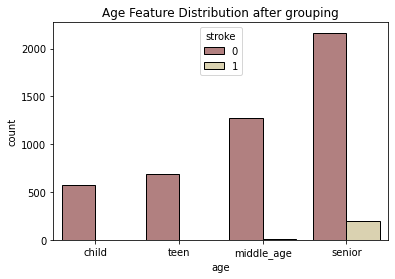

In [ ]:
sns.countplot(data=df1, x='age',palette = 'pink', hue='stroke',edgecolor='black').set(title='Age Feature Distribution after grouping')

[Text(0.5, 1.0, 'avg_glucose level Feature Distribution after grouping')]

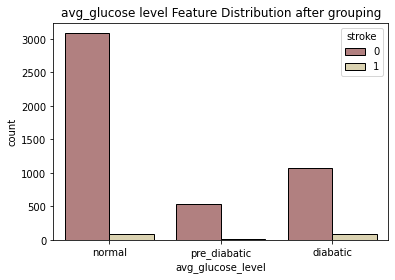

In [ ]:
sns.countplot(data=df1, x='avg_glucose_level',palette = 'pink', hue='stroke',edgecolor='black').set(title='avg_glucose level Feature Distribution after grouping')

[Text(0.5, 1.0, 'bmi Feature Distribution after grouping')]

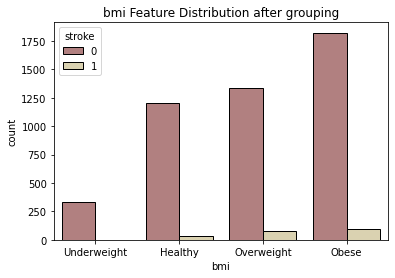

In [ ]:
sns.countplot(data=df1, x='bmi',palette = 'pink', hue='stroke',edgecolor='black').set(title='bmi Feature Distribution after grouping')

In [ ]:
#get categorical variables
list(set(df1.columns) - set(df1.describe().columns))

['bmi',
 'gender',
 'work_type',
 'avg_glucose_level',
 'smoking_status',
 'Residence_type',
 'ever_married',
 'age']

In [ ]:
#drop id coulumn
df1=df1.drop('id', axis=1)

In [ ]:
#Lable encoding the df1 data frame
label_encoder = preprocessing.LabelEncoder()

label_cols = ["gender","age", "ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]
for col in label_cols:
    df1[col]= label_encoder.fit_transform(df1[col])

In [ ]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,2,0,1,1,2,1,0,1,1,1
2,1,2,0,1,1,2,0,2,1,2,1
3,0,2,0,0,1,2,1,0,1,3,1
4,0,2,1,0,1,3,0,0,0,2,1
5,1,2,0,0,1,2,1,0,2,1,1


In [ ]:
#function that splits the variable attributes and target
def load_data(data_dir):
    data   = data_dir.iloc[:,:-1]
    labels = data_dir.iloc[:,-1]
    return data, labels

In [ ]:
#split independent and target variables
data, labels = load_data(df1)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20,shuffle=False)

In [ ]:
#normalization and scalling
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
#Logistic model train for df1 )(nan values droped)
lr = LogisticRegression()
clf =lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)
print("accuracy score for trained data: ",accuracy_score(y_train,lr.predict(x_train))*100)
print("accuracy score for test data: ",accuracy_score(y_test,y_lr_pred)*100)


accuracy score for trained data:  94.67787114845937
accuracy score for test data:  100.0


In [ ]:
#performace metrics of df1 dataframe for logistic refression
print(precision_score(y_test, y_lr_pred, average=None))
print(recall_score(y_test, y_lr_pred, average=None))
print(f1_score(y_test, y_lr_pred, average=None))

[1.]
[1.]
[1.]


In [ ]:
# logistic mmodel coefficents and intercept
print(clf.coef_, clf.intercept_)

[[-0.0517542   0.5635068   0.28759182  0.2394503   0.6149783   0.03205641
   0.02300277 -0.26183751  0.067254    0.09553007]] [-3.35490817]


In [ ]:
#RF model train for df1 )(nan values droped)
rd_clf = RandomForestClassifier()
clf_random = rd_clf.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(x_test))*100

print(f"Training Accuracy of random forest Classifier is {accuracy_score(y_train, rd_clf.predict(x_train))*100}")
print(f"Test Accuracy of random forest Classifier is {rd_clf_acc} \n")


Training Accuracy of random forest Classifier is 96.48586707410237
Test Accuracy of random forest Classifier is 98.57433808553971 



In [ ]:
#performace metrics of df1 dataframe for Random Forest
print(precision_score(y_test, rd_clf.predict(x_test), average=None))
print(recall_score(y_test, rd_clf.predict(x_test), average=None))
print(f1_score(y_test, rd_clf.predict(x_test), average=None))

[1. 0.]
[0.98574338 0.        ]
[0.99282051 0.        ]


In [ ]:
#Feature Imporatnce of random forest model
clf_random.feature_importances_

array([0.08323578, 0.05847836, 0.05354972, 0.05377792, 0.03808591,
       0.14486672, 0.08645567, 0.11039919, 0.15810755, 0.21304319])

In [ ]:
#Preprocesing and EDA of df_median and df_random data frames.

In [ ]:
df_new=df.drop(columns=['bmi',"id"])
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_median,bmi_random
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6,36.6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1,27.3
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5,32.5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4,34.4
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0,24.0


In [ ]:
#grouping
df_new['bmi_median'] = pd.cut(x=df_new['bmi_median'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])
df_new['bmi_random'] = pd.cut(x=df_new['bmi_random'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])
df_new['age'] = pd.cut(x=df_new['age'], bins=[0,12.0,25.0,45.0,100],
                     labels=['child','teen','middle_age', 'senior'])
df_new['avg_glucose_level'] = df['avg_glucose_level'].div(18).round(2)
df_new['avg_glucose_level'] = pd.cut(x=df_new['avg_glucose_level'], bins=[0,5.7,6.4,15.1],
                     labels=['normal','pre_diabatic','diabatic'])
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_median,bmi_random
0,Male,senior,0,1,Yes,Private,Urban,diabatic,formerly smoked,1,Obese,Obese
1,Female,senior,0,0,Yes,Self-employed,Rural,diabatic,never smoked,1,Overweight,Overweight
2,Male,senior,0,1,Yes,Private,Rural,pre_diabatic,never smoked,1,Obese,Obese
3,Female,senior,0,0,Yes,Private,Urban,diabatic,smokes,1,Obese,Obese
4,Female,senior,1,0,Yes,Self-employed,Rural,diabatic,never smoked,1,Healthy,Healthy


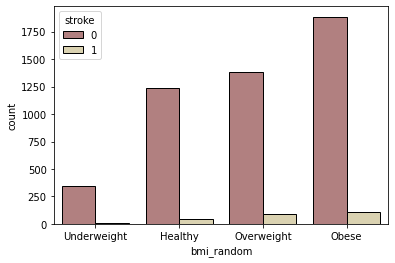

In [ ]:
sns.countplot(data=df_new, x='bmi_random',palette = 'pink', hue='stroke',edgecolor='black')

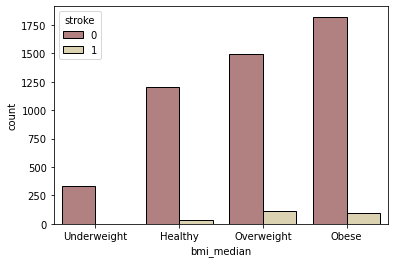

In [ ]:
sns.countplot(data=df_new, x='bmi_median',palette = 'pink', hue='stroke',edgecolor='black')

In [ ]:
df_new_median= df_new.drop(columns=['bmi_random'])
df_new_random= df_new.drop(columns=['bmi_median'])

In [ ]:
df_new_median.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_median
0,Male,senior,0,1,Yes,Private,Urban,diabatic,formerly smoked,1,Obese
1,Female,senior,0,0,Yes,Self-employed,Rural,diabatic,never smoked,1,Overweight
2,Male,senior,0,1,Yes,Private,Rural,pre_diabatic,never smoked,1,Obese
3,Female,senior,0,0,Yes,Private,Urban,diabatic,smokes,1,Obese
4,Female,senior,1,0,Yes,Self-employed,Rural,diabatic,never smoked,1,Healthy


In [ ]:
#Altering the index of bmi_median and stroke
columns_titles = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","smoking_status","bmi_median","stroke"]
df_new_median=df_new_median.reindex(columns=columns_titles)
df_new_median.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi_median,stroke
0,Male,senior,0,1,Yes,Private,Urban,diabatic,formerly smoked,Obese,1
1,Female,senior,0,0,Yes,Self-employed,Rural,diabatic,never smoked,Overweight,1
2,Male,senior,0,1,Yes,Private,Rural,pre_diabatic,never smoked,Obese,1
3,Female,senior,0,0,Yes,Private,Urban,diabatic,smokes,Obese,1
4,Female,senior,1,0,Yes,Self-employed,Rural,diabatic,never smoked,Healthy,1


In [ ]:
#Altering the index of bmi_random and stroke
columns_titles = ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","smoking_status","bmi_random","stroke"]
df_new_random=df_new_random.reindex(columns=columns_titles)
df_new_random.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi_random,stroke
0,Male,senior,0,1,Yes,Private,Urban,diabatic,formerly smoked,Obese,1
1,Female,senior,0,0,Yes,Self-employed,Rural,diabatic,never smoked,Overweight,1
2,Male,senior,0,1,Yes,Private,Rural,pre_diabatic,never smoked,Obese,1
3,Female,senior,0,0,Yes,Private,Urban,diabatic,smokes,Obese,1
4,Female,senior,1,0,Yes,Self-employed,Rural,diabatic,never smoked,Healthy,1


In [ ]:
#lable encoding for df_median, df_random models
label_cols = ["gender","age", "ever_married","work_type","Residence_type","avg_glucose_level","bmi_median","smoking_status","stroke"]
for col in label_cols:
    df_new_median[col]= label_encoder.fit_transform(df_new_median[col])
label_cols = ["gender","age", "ever_married","work_type","Residence_type","avg_glucose_level","bmi_random","smoking_status","stroke"]    
for col in label_cols:
    df_new_random[col]= label_encoder.fit_transform(df_new_random[col])  

In [ ]:
df_new_median.head()
df_new_median['age'].unique()

array([2, 1, 0, 3])

In [ ]:
data1, labels1 = load_data(df_new_median)
#spliting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(data1, labels1, test_size=0.20,shuffle=False)
data2, labels2 = load_data(df_new_random)
#spliting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(data2, labels2, test_size=0.20,shuffle=False)


In [ ]:
#normalizing and scaling the df_median modesl
x1_train = std.fit_transform(x1_train)
x1_test = std.transform(x1_test)
sm = SMOTE(random_state=2)
x1_train_res, y1_train_res = sm.fit_resample(x1_train, y1_train.ravel())

In [ ]:
#normalizing and scaling the df_random modesl
x2_train = std.fit_transform(x2_train)
x2_test = std.transform(x2_test)
sm = SMOTE(random_state=2)
x2_train_res, y1_train_res = sm.fit_resample(x2_train, y2_train.ravel())

In [ ]:
#modling logistic regrssion for df_median dataframe
clf1 = lr.fit(x1_train,y1_train)
y1_lr_pred = lr.predict(x1_test)
print("accuracy score for trained data: ",accuracy_score(y1_train,lr.predict(x1_train))*100)
print("accuracy score for test data: ",accuracy_score(y1_test,y1_lr_pred)*100)

accuracy score for trained data:  93.90900195694715
accuracy score for test data:  100.0


In [ ]:
#Model coeff for df_median data
print(clf1.coef_, clf1.intercept_)

[[-0.053089    0.55669834  0.25879887  0.23555251  0.59845376  0.01952792
   0.07066685 -0.21582864 -0.04572521  0.21122714]] [-3.15244419]


In [ ]:
#performance meteric of df_median data
print(precision_score(y1_test, y1_lr_pred, average=None))
print(recall_score(y1_test, y1_lr_pred, average=None))
print(f1_score(y1_test, y1_lr_pred, average=None))

[1.]
[1.]
[1.]


In [ ]:
#modling RF for df_median dataframe
clf_rf1 = rd_clf.fit(x1_train, y1_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y1_test, rd_clf.predict(x1_test))*100

print(f"Training Accuracy of random Classifier is {accuracy_score(y1_train, rd_clf.predict(x1_train))*100}")
print(f"Test Accuracy of random Classifier is {rd_clf_acc} \n")

Training Accuracy of random Classifier is 95.71917808219177
Test Accuracy of random Classifier is 98.53228962818004 



In [ ]:
#fEATURE IMPORATNCE OF RF model on df_median
clf_rf1.feature_importances_

array([0.0830229 , 0.06728273, 0.05254466, 0.05262928, 0.04367337,
       0.14225056, 0.09654243, 0.10934838, 0.213923  , 0.13878269])

In [ ]:
#Performance metrices of RF model on df_median data
print(precision_score(y1_test, rd_clf.predict(x1_test), average=None))
print(recall_score(y1_test, rd_clf.predict(x1_test), average=None))
print(f1_score(y1_test, rd_clf.predict(x1_test), average=None))

[1. 0.]
[0.9853229 0.       ]
[0.9926072 0.       ]


In [ ]:
#modling logistic regrssion for df_random dataframe
lr.fit(x2_train,y2_train)
y2_lr_pred = lr.predict(x2_test)
print("accuracy score for trained data: ",accuracy_score(y2_train,lr.predict(x2_train))*100)
print("accuracy score for test data: ",accuracy_score(y2_test,y2_lr_pred)*100)

accuracy score for trained data:  93.90900195694715
accuracy score for test data:  100.0


In [ ]:
#Performance metrices of logistic regression model on df_random data
print(precision_score(y2_test, y2_lr_pred, average=None))
print(recall_score(y2_test, y2_lr_pred, average=None))
print(f1_score(y2_test, y2_lr_pred, average=None))

[1.]
[1.]
[1.]


In [ ]:
#modling RF model for df_random dataframea
rd_clf.fit(x2_train, y2_train)

rd_clf_acc = accuracy_score(y2_test, rd_clf.predict(x2_test))*100

print(f"Training Accuracy of random Classifier is {accuracy_score(y2_train, rd_clf.predict(x2_train))*100}")
print(f"Test Accuracy of random Classifier is {rd_clf_acc} \n")

Training Accuracy of random Classifier is 95.93933463796478
Test Accuracy of random Classifier is 98.33659491193738 



In [ ]:
#Performance metrices of RF model on df_random data
print(precision_score(y2_test, rd_clf.predict(x2_test), average=None))
print(recall_score(y2_test, rd_clf.predict(x2_test), average=None))
print(f1_score(y2_test, rd_clf.predict(x2_test), average=None))

[1. 0.]
[0.98336595 0.        ]
[0.99161322 0.        ]


In [ ]:
#pvalue calculation
import statsmodels.api as sm
data_1 = sm.add_constant(data1)
#Fitting sm.OLS model
model = sm.OLS(labels1,data_1).fit()
model.pvalues

const                3.367236e-01
gender               7.607853e-01
age                  2.488433e-05
hypertension         1.560182e-11
heart_disease        4.666635e-14
ever_married         1.453117e-07
work_type            2.378566e-01
Residence_type       2.375124e-01
avg_glucose_level    1.000383e-03
smoking_status       2.600847e-01
bmi_median           1.489658e-02
dtype: float64

In [ ]:
glm_binom = sm.GLM(labels1, data_1, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                            GLM   Df Residuals:                     5099
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -894.04
Date:                Sat, 02 Jul 2022   Deviance:                       1788.1
Time:                        12:57:21   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5924      0.45

In [ ]:
#get odd ratio
params = np.exp(res.params)
conf = np.exp(res.conf_int())
conf['OR'] = params
pvalue=round(res.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                   CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                  0.001542       0.009005    0.003726   0.000
gender                 0.722341       1.234094    0.944159   0.674
age                    1.538368       2.558608    1.983956   0.000
hypertension           1.739767       3.256072    2.380085   0.000
heart_disease          1.954651       4.033354    2.807811   0.000
ever_married           2.402390       5.614783    3.672724   0.000
work_type              0.897252       1.191416    1.033925   0.645
Residence_type         0.903004       1.526170    1.173941   0.231
avg_glucose_level      0.562889       0.880856    0.704148   0.002
smoking_status         0.832722       1.085115    0.950578   0.453
bmi_median             1.071258       1.532134    1.281137   0.007


In [ ]:
#% of odd ratio
lst=[]
prob=[]
for i in range(1,11):
  lst.append(conf.iloc[i,2])
for i in range(len(lst)):
  prob.append((lst[i]-1)*100)
print(prob)

[-5.584111813277126, 98.39559943536982, 138.0085077853482, 180.78106706592956, 267.27235807747934, 3.392504218524617, 17.394129000816207, -29.585220658563095, -4.942179569826899, 28.113656535247266]


In [ ]:
#feature imporatnce based on p value
cols = list(data1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    data_1 = data1[cols]
    data_1 = sm.add_constant(data_1)
    model = sm.OLS(labels1,data_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi_median']


In [ ]:
#Crossvalidation kfold =5

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics 
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline

In [ ]:
k_data, k_label = load_data(df_new_median)

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
f2 = make_scorer(fbeta_score, beta=2)


In [ ]:
#Unbalanced Data
X_train, X_test, y_train, y_test = train_test_split(k_data,k_label,test_size=0.20, random_state=32)

In [ ]:
from imblearn.over_sampling import SMOTE
#balanced Data Oversampling
sm = SMOTE(random_state=0)
synthetic_X, synthetic_y = sm.fit_resample(X_train, y_train)
synthetic_y.value_counts()

0    3889
1    3889
Name: stroke, dtype: int64

In [ ]:
from sklearn.utils import resample
#balanced Data Undersampling
train = X_train.copy()
train['stroke'] = y_train
stroke = train[(train.stroke == 1)]
not_stroke = train[(train.stroke == 0)]
not_stroke_downsampled = resample(not_stroke, replace=False, n_samples=len(stroke), random_state=32)
train_downsampled = pd.concat([not_stroke_downsampled, stroke]).sample(frac=1)
train_downsampled.stroke.value_counts()
downsampled_y = train_downsampled['stroke']
downsampled_X = train_downsampled.drop('stroke', axis=1)
downsampled_y.value_counts()

1    199
0    199
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
#Logistic Regression on unbalanced data
lg = LogisticRegression(random_state = 32)
lf = RandomizedSearchCV(lg, hyperparameters, random_state=32, n_iter=100, cv=kfold, verbose=0, n_jobs=-1)
search_rf = lf.fit(X_train, y_train)
rf_tuned = search_rf.best_estimator_
y_pred_prob_yes = rf_tuned.predict_proba(X_test)[::,1]
y_pred = rf_tuned.predict(X_test)

In [ ]:
#Performance Metrics of Logistic Regression on unbalanced data
print("unbalanced data LR accuracy score",accuracy_score(y_test, y_pred))
print("unbalanced data LR precision score",precision_score(y_test, y_pred))
print("unbalanced data LR recall score",recall_score(y_test, y_pred))
print("unbalanced data LR f1 score",f1_score(y_test, y_pred))

unbalanced data LR accuracy score 0.9510763209393346
unbalanced data LR precision score 0.0
unbalanced data LR recall score 0.0
unbalanced data LR f1 score 0.0


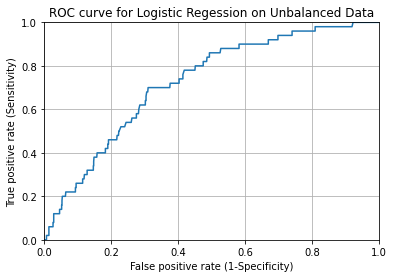

In [ ]:
#ROC curve for Logistic Regression on unbalanced data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regession on Unbalanced Data')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
#Logistic Regression on undersampled data
lf = RandomizedSearchCV(lg, hyperparameters, random_state=32, n_iter=100, cv=kfold, verbose=0, n_jobs=-1)
search_rf = lf.fit(downsampled_X, downsampled_y)
rf_tuned = search_rf.best_estimator_
y_pred_prob_yes_ds = rf_tuned.predict_proba(X_test)[::,1]
y_pred_ds = rf_tuned.predict(X_test)

In [ ]:
#Performance Metrics of Logistic Regression on undersampled data
print("downsampled data LR accuracy score",accuracy_score(y_test, y_pred_ds))
print("downsampled data LR precision score",precision_score(y_test, y_pred_ds))
print("downsampled data LR recall score",recall_score(y_test, y_pred_ds))
print("downsampled data LR f1 score",f1_score(y_test, y_pred_ds))

downsampled data LR accuracy score 0.6448140900195695
downsampled data LR precision score 0.09350649350649351
downsampled data LR recall score 0.72
downsampled data LR f1 score 0.16551724137931034


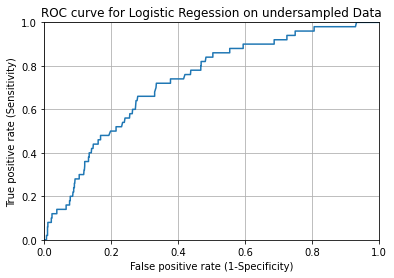

In [ ]:
#ROC curve of Logistic Regression on undersampled data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes_ds)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regession on undersampled Data')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
#Logistic Regression on oversampled data
lf = RandomizedSearchCV(lg, hyperparameters, random_state=1, n_iter=100, cv=kfold, verbose=0, n_jobs=-1)
search_rf = lf.fit(synthetic_X, synthetic_y)
rf_tuned = search_rf.best_estimator_
y_pred_prob_yes_os = rf_tuned.predict_proba(X_test)[::,1]
y_pred_os = rf_tuned.predict(X_test)

In [ ]:
#Performance Metrics of Logistic Regression on oversampled data
print("oversampled data LR accuracy score",accuracy_score(y_test, y_pred_os))
print("oversampled data LR precision score",precision_score(y_test, y_pred_os))
print("oversampled data LR recall score",recall_score(y_test, y_pred_os))
print("oversampled data LR f1 score",f1_score(y_test, y_pred_os))

oversampled data LR accuracy score 0.6027397260273972
oversampled data LR precision score 0.0761904761904762
oversampled data LR recall score 0.64
oversampled data LR f1 score 0.13617021276595745


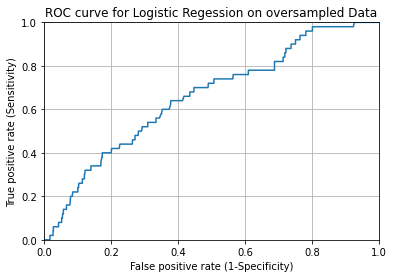

In [ ]:
#ROC curve of Logistic Regression on oversampled data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes_os)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regession on oversampled Data')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
r_forest = RandomForestClassifier(class_weight='balanced', random_state=32)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
parameters_rf = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split = [2, 5, 10,15], min_samples_leaf=[2,5,10,15])

In [ ]:
#Random forest on unbalanced data
clf_rf = RandomizedSearchCV(r_forest, parameters_rf,cv=kfold, random_state=32, n_jobs=-1)
search_rf = clf_rf.fit(X_train, y_train)
r_forest= search_rf.best_estimator_
y_pred_proba_rf = r_forest.predict_proba(X_test)[::,1]
y_pred_rf = r_forest.predict(X_test)

In [ ]:
#Performance Metrics of Random Forest on unbalanced data
print("unbalanced data RF accuracy score",accuracy_score(y_test, y_pred_rf))
print("unbalanced data RF precision score",precision_score(y_test, y_pred_rf))
print("unbalanced data RF recall score",recall_score(y_test, y_pred_rf))
print("unbalanced data RF f1 score",f1_score(y_test, y_pred_rf))

unbalanced data RF accuracy score 0.8649706457925636
unbalanced data RF precision score 0.10714285714285714
unbalanced data RF recall score 0.24
unbalanced data RF f1 score 0.1481481481481481


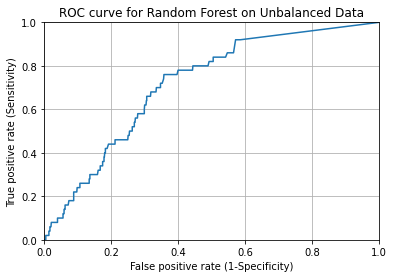

In [ ]:
#ROC curve of Random forest on unbalanced data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest on Unbalanced Data')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
#Random forest on undersampled data
clf_rf = RandomizedSearchCV(r_forest, parameters_rf,cv=kfold, random_state=32, n_jobs=-1)
search_rf = clf_rf.fit(downsampled_X, downsampled_y)
r_forest= search_rf.best_estimator_
y_pred_proba_rf_ds = r_forest.predict_proba(X_test)[::,1]
y_pred_rf_ds = r_forest.predict(X_test)

In [ ]:
#Performance Metrics of Random Forest on undersampled data
print("unbalanced data RF accuracy score",accuracy_score(y_test, y_pred_rf_ds))
print("unbalanced data RF precision score",precision_score(y_test, y_pred_rf_ds))
print("unbalanced data RF recall score",recall_score(y_test, y_pred_rf_ds))
print("unbalanced data RF f1 score",f1_score(y_test, y_pred_rf_ds))

unbalanced data RF accuracy score 0.5802348336594912
unbalanced data RF precision score 0.09766454352441614
unbalanced data RF recall score 0.92
unbalanced data RF f1 score 0.17658349328214973


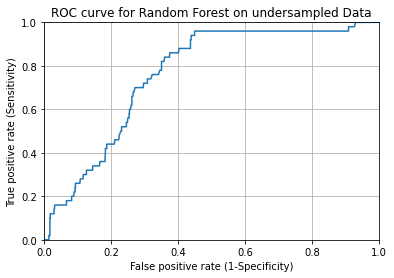

In [ ]:
#ROC curve of Random forest on undersapled data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_ds)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest on undersampled Data')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
#Random forest on oversampled data
clf_rf = RandomizedSearchCV(r_forest, parameters_rf,cv=kfold, random_state=32, n_jobs=-1)
search_rf = clf_rf.fit(synthetic_X, synthetic_y)
r_forest= search_rf.best_estimator_
y_pred_proba_rf_os = r_forest.predict_proba(X_test)[::,1]
y_pred_rf_os = r_forest.predict(X_test)

In [ ]:
#Performance Metrics of Random Forest on oversampled data
print("unbalanced data RF accuracy score",accuracy_score(y_test, y_pred_rf_os))
print("unbalanced data RF precision score",precision_score(y_test, y_pred_rf_os))
print("unbalanced data RF recall score",recall_score(y_test, y_pred_rf_os))
print("unbalanced data RF f1 score",f1_score(y_test, y_pred_rf_os))

unbalanced data RF accuracy score 0.7592954990215264
unbalanced data RF precision score 0.0811965811965812
unbalanced data RF recall score 0.38
unbalanced data RF f1 score 0.13380281690140847


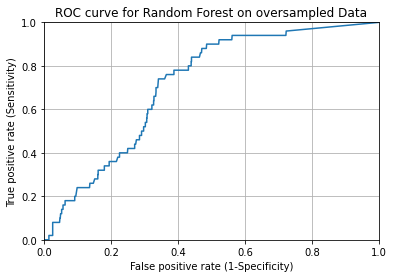

In [ ]:
#ROC curve of Random forest on oversampled data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_os)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest on oversampled Data')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)